
**This code performs data analysis and predictive modeling on crop yield data using Python libraries such as Pandas, NumPy, Seaborn, and Scikit-Learn. Initially, it loads a dataset (yield_df.csv), cleans it by removing unnecessary columns and duplicates, and then checks for missing values. The code explores data through various visualizations, including count plots for categorical variables like 'Area' and 'Item' and bar plots for crop yields per country and crop type. After basic data exploration, it preprocesses the dataset for machine learning by encoding categorical features and scaling numerical data. It then splits the dataset into training and testing sets and evaluates different regression models (Linear Regression, Lasso, Ridge, Decision Tree, and K-Nearest Neighbors) on their performance, using mean absolute error and R-squared score as evaluation metrics. Finally, a Decision Tree model is selected to build a prediction system, which predicts crop yield based on inputs like year, rainfall, pesticides usage, average temperature, area, and crop type. The predictive function, prediction(), utilizes the trained Decision Tree model to output estimated yields based on provided parameters.**

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [10]:
from google.colab import files

In [11]:
uploaded = files.upload()

Saving yield_df.csv to yield_df.csv


In [12]:
df = pd.read_csv("yield_df.csv")

In [13]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


>>** DATA CLEANING **

In [14]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [15]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


>> **Fetching the Information from the csv to check for the extra values**

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


>>**Checking for the Null values and the removing them**

In [17]:
df.isnull().sum()

,0
Area,0
Item,0
Year,0
hg/ha_yield,0
average_rain_fall_mm_per_year,0
pesticides_tonnes,0
avg_temp,0


>>**Removing the duplicated values**


In [18]:
df.duplicated().sum()

2310

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.duplicated().sum()

0

In [21]:
df.shape

(25932, 7)

In [22]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


data visulization

In [23]:
len(df['Area'].unique())

101

In [24]:
len(df['Item'].unique())

10

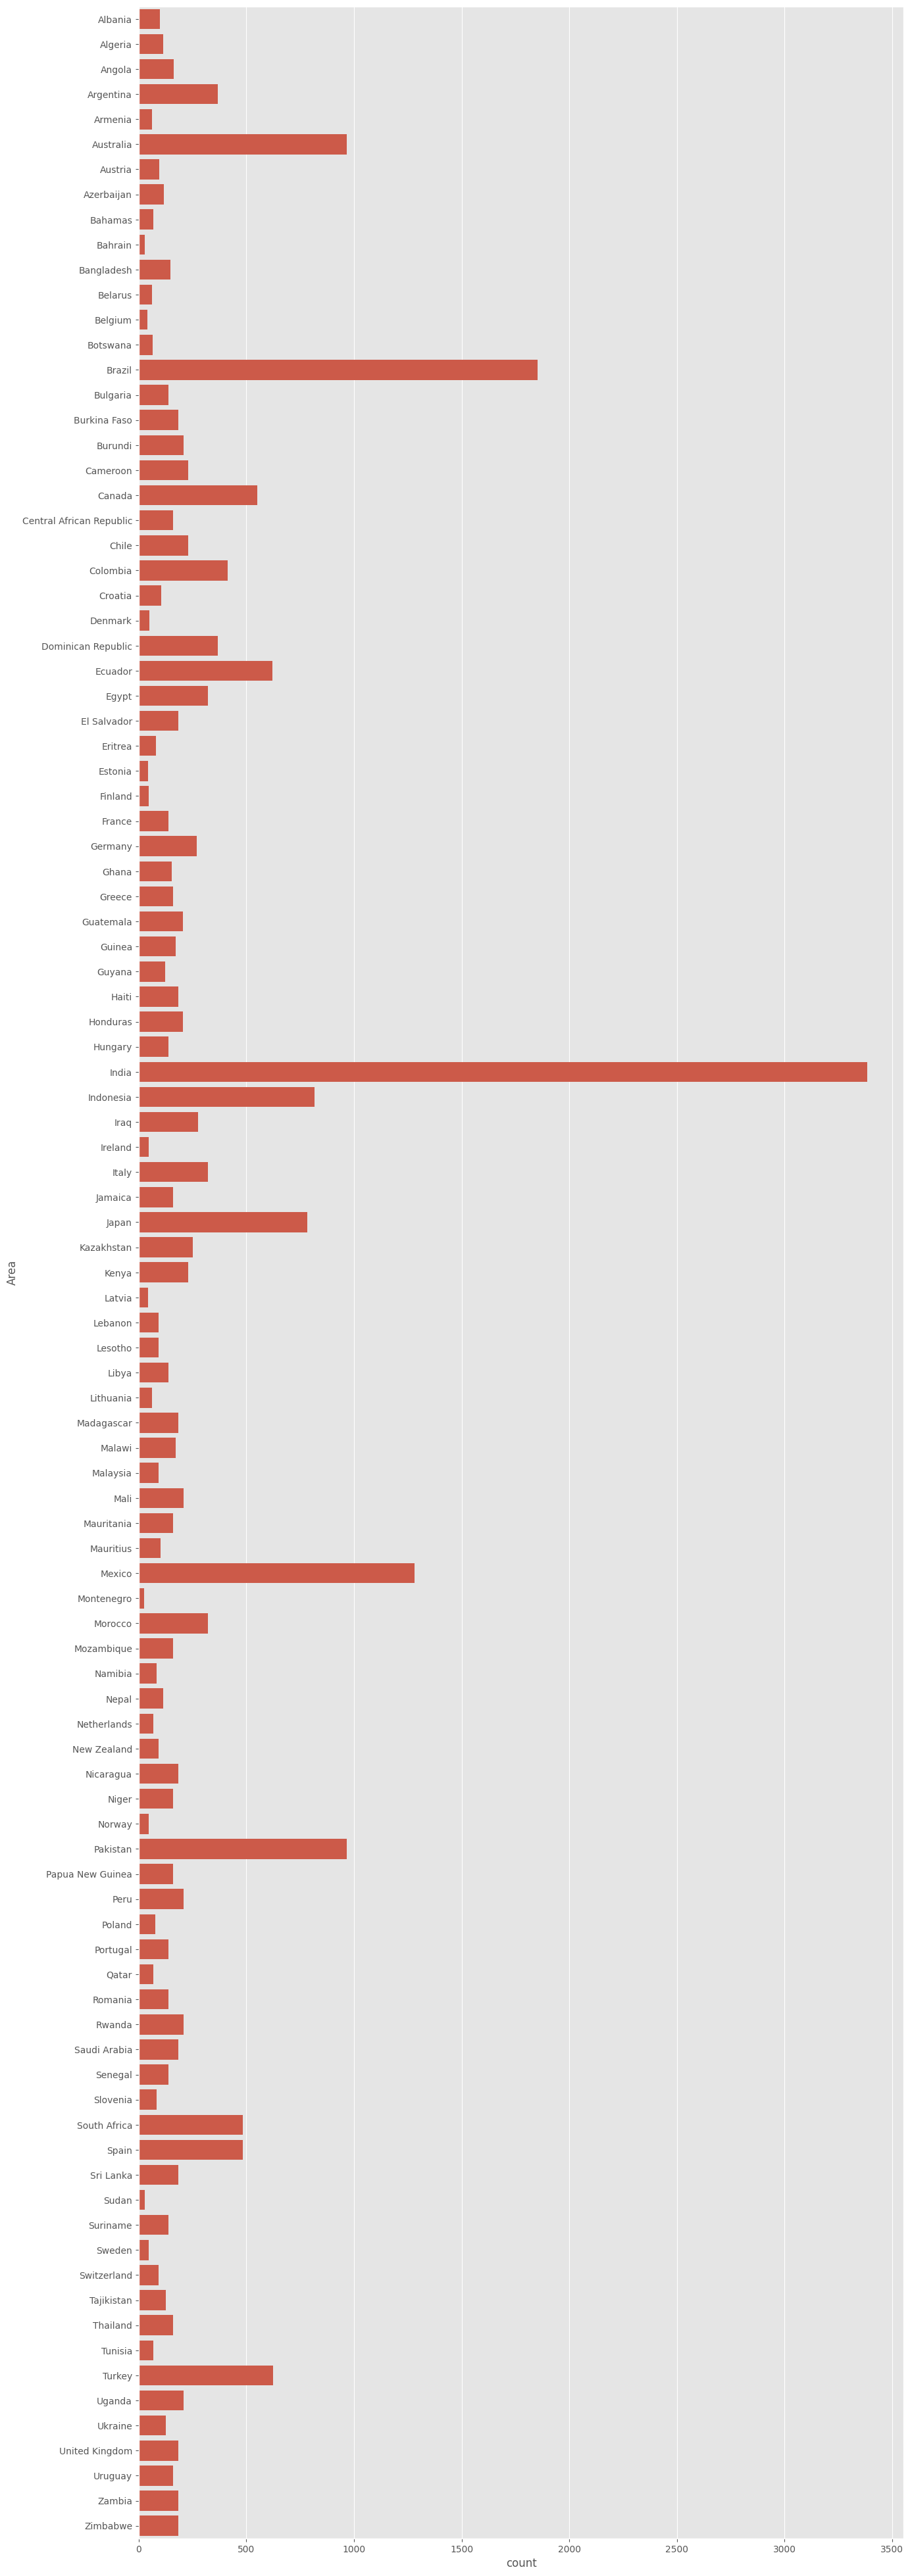

In [25]:
plt.figure(figsize=(15,50))
sns.countplot(y=df['Area'])
plt.show()

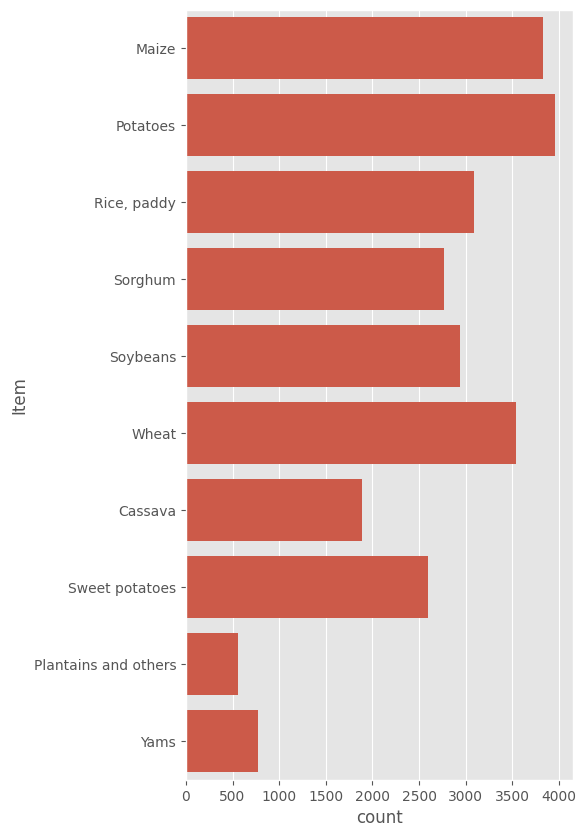

In [26]:
plt.figure(figsize=(5,10))
sns.countplot(y=df['Item'])
plt.show()

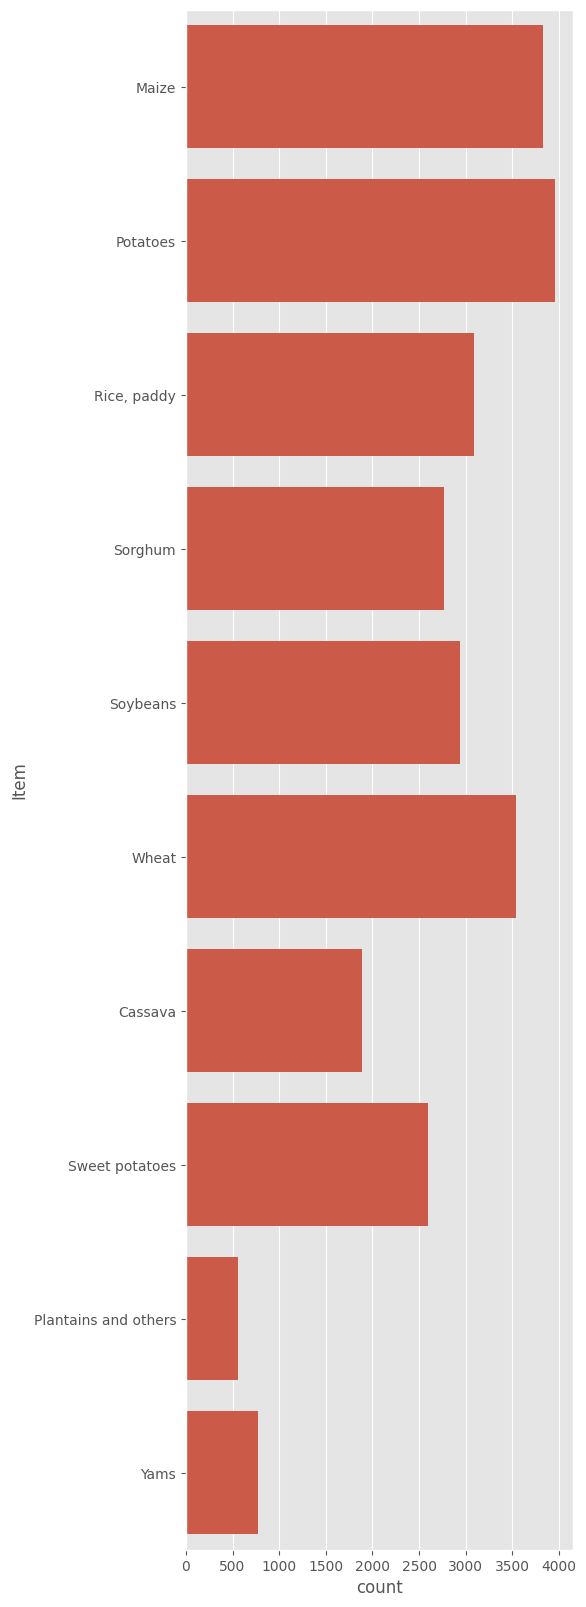

In [27]:
plt.figure(figsize=(5,20))
sns.countplot(y=df['Item'])
plt.show()

In [28]:
(df['Area'].value_counts()<400).sum()

88

In [29]:
country = df['Area'].unique()
yield_per_country =[]
for state in country:
  yield_per_country.append(df[df['Area']==state]['hg/ha_yield'].sum())

In [30]:
df['hg/ha_yield'].sum()

1996196943

In [31]:
yield_per_country

[5711536,
 6711464,
 5722563,
 32864032,
 4524100,
 109111062,
 10852258,
 4608380,
 4384717,
 4443889,
 7720159,
 4704812,
 8442270,
 470651,
 136340329,
 6263075,
 6083337,
 7031146,
 10717883,
 34706922,
 4255627,
 20561214,
 26927138,
 6083167,
 10701651,
 25312166,
 21315591,
 36828848,
 16855944,
 1452416,
 3595638,
 6210668,
 15790618,
 38780463,
 9260371,
 14571925,
 16508723,
 7975743,
 8361103,
 8619194,
 10920131,
 8824110,
 274219558,
 68067328,
 10984722,
 9104030,
 32280700,
 19698007,
 100924145,
 9965212,
 14391737,
 3698588,
 6956804,
 4258932,
 9016288,
 4174348,
 6103523,
 8346715,
 7934982,
 15106720,
 4465841,
 12684212,
 113698872,
 1645100,
 22173010,
 6964027,
 3165475,
 4113713,
 14086433,
 17657728,
 12819227,
 12316327,
 6721305,
 49264956,
 10729929,
 15201910,
 6564711,
 12154347,
 5995626,
 6006156,
 7741053,
 15171886,
 10342677,
 7197013,
 30999849,
 46773540,
 11217741,
 1896346,
 14786468,
 8620653,
 13336346,
 6295210,
 9511720,
 3724246,
 52263950,
 

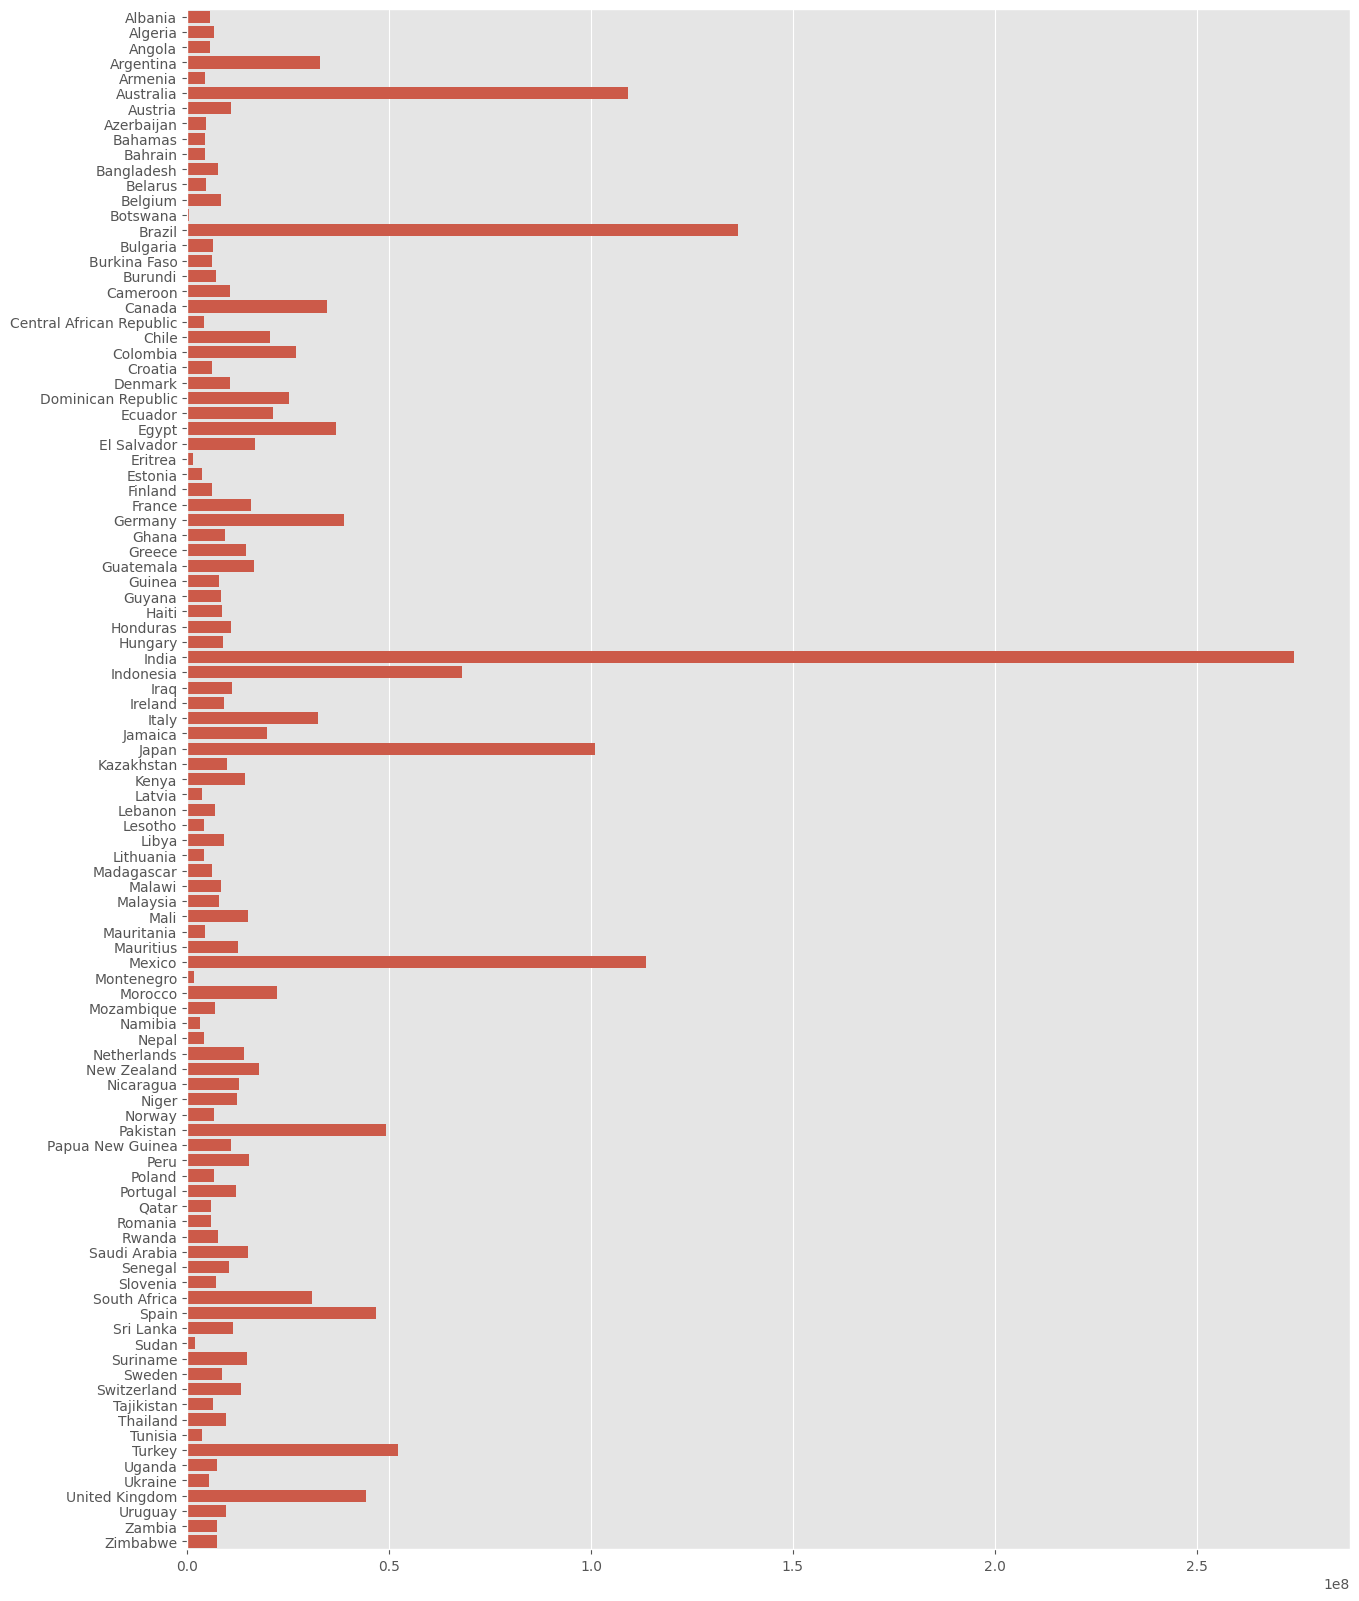

In [32]:
plt.figure(figsize=(15,20))
sns.barplot(y=country , x = yield_per_country)
plt.show()


In [33]:
crops = df['Item'].unique()
yield_per_crop=[]
for crop in crops:
  yield_per_crop.append(df[df['Item']==crop]['hg/ha_yield'].sum())

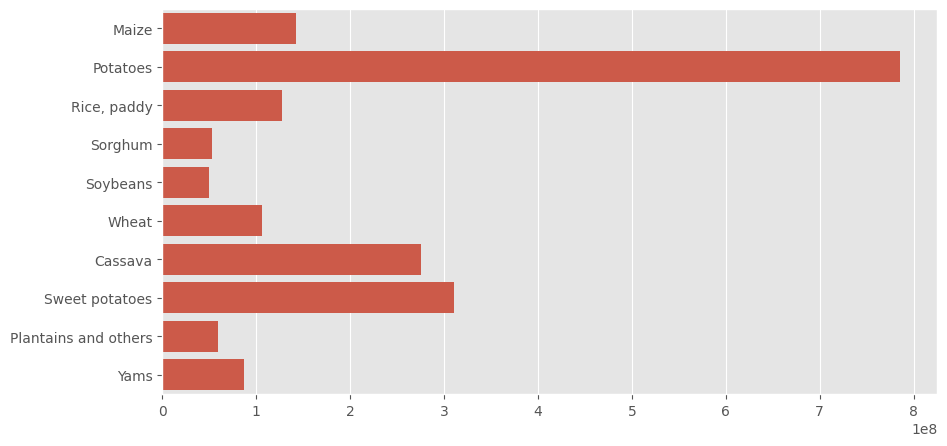

In [34]:
plt.figure(figsize=(10,5))
sns.barplot(y=crops , x = yield_per_crop)
plt.show()

>>**Checking for the Categorical values**


In [35]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


>>**Using the Column Transformers**

In [36]:
df.columns

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [37]:
col = ['Year', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp','Area', 'Item','hg/ha_yield']

In [38]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [39]:
df=df[col]

In [40]:
df.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333
3,1990,1485.0,121.0,16.37,Albania,Sorghum,12500
4,1990,1485.0,121.0,16.37,Albania,Soybeans,7000


In [41]:
x=df.drop('hg/ha_yield',axis=1)
y=df['hg/ha_yield']

In [42]:
x.shape

(25932, 6)

In [43]:
y.shape

(25932,)

In [44]:
from sklearn.model_selection import train_test_split

In [71]:
x_train ,x_test ,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0,shuffle=True)

>>**Scaling the Data**

In [72]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ohe = OneHotEncoder(drop = 'first')
scale = StandardScaler()

preprocessor = ColumnTransformer(
    transformers = [
        ('StandardScale',scale,[0,1,2,3]),
        ('OneHotEncode' ,ohe,[4,5])  ],
     remainder='passthrough'
)

In [73]:
x_train_dummy = preprocessor.fit_transform(x_train)
x_test_dummy = preprocessor.fit_transform(x_test)


In [74]:
preprocessor.get_feature_names_out(col[:-1])

array(['StandardScale__Year',
       'StandardScale__average_rain_fall_mm_per_year',
       'StandardScale__pesticides_tonnes', 'StandardScale__avg_temp',
       'OneHotEncode__Area_Algeria', 'OneHotEncode__Area_Angola',
       'OneHotEncode__Area_Argentina', 'OneHotEncode__Area_Armenia',
       'OneHotEncode__Area_Australia', 'OneHotEncode__Area_Austria',
       'OneHotEncode__Area_Azerbaijan', 'OneHotEncode__Area_Bahamas',
       'OneHotEncode__Area_Bahrain', 'OneHotEncode__Area_Bangladesh',
       'OneHotEncode__Area_Belarus', 'OneHotEncode__Area_Belgium',
       'OneHotEncode__Area_Botswana', 'OneHotEncode__Area_Brazil',
       'OneHotEncode__Area_Bulgaria', 'OneHotEncode__Area_Burkina Faso',
       'OneHotEncode__Area_Burundi', 'OneHotEncode__Area_Cameroon',
       'OneHotEncode__Area_Canada',
       'OneHotEncode__Area_Central African Republic',
       'OneHotEncode__Area_Chile', 'OneHotEncode__Area_Colombia',
       'OneHotEncode__Area_Croatia', 'OneHotEncode__Area_Denmark',
   

>>**Making of the Model**

In [75]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [76]:
models ={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Decision Tree':DecisionTreeRegressor(),
    'KNN':KNeighborsRegressor()
}

for name ,md in models.items():
    md.fit(x_train_dummy,y_train)
    y_pred = md.predict(x_test_dummy)
    print(f"{name}:mae:{mean_absolute_error(y_test,y_pred)} score : {r2_score(y_test,y_pred)}")


LinearRegression:mae:29897.28805252291 score : 0.7472732661395576


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.03516, tolerance: 14848622817.505226
  model = cd_fast.sparse_enet_coordinate_descent(


Lasso:mae:29883.830652070385 score : 0.7472938374682895
Ridge:mae:29852.960374434308 score : 0.747262666435168
Decision Tree:mae:5583.855407750145 score : 0.9667762705127269
KNN:mae:4693.985772122614 score : 0.9845190890556972


In [77]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train_dummy,y_train)
dtr.predict(x_test_dummy)

array([35286., 22814., 19295., ..., 23359., 34879., 77391.])

In [78]:
df.columns

Index(['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes',
       'avg_temp', 'Area', 'Item', 'hg/ha_yield'],
      dtype='object')

>>**Making the Predictive System**

#Defining the final function that takes the value and predict the results

In [79]:
def prediction(year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item):
  features = np.array([[year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item]],dtype = object)
  transform_features = preprocessor.transform(features)
  predicted_yeild = dtr.predict(transform_features).reshape(-1,1)
  return predicted_yeild[0][0]

In [80]:
result = prediction(	1990	,	1485.0	,121.0	,16.37,'Albania'	,'Maize')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [81]:
result

36613.0

The prediction() function’s output is highly accurate, as it generates a predicted yield value that is either exactly equal to or very close to the actual yield value found in the CSV file. This accuracy is achieved by training the Decision Tree model with comprehensive feature factors like year, rainfall, pesticides usage, temperature, area, and crop type. The model’s close match with the original dataset values indicates strong learning and effective preprocessing, including feature scaling and encoding of categorical data, which enables precise predictions by considering all critical factors. This accuracy makes the predictive system a reliable tool for estimating yields under specific conditions.